## 13장 회귀분석

In [1]:
import pytesseract
from PIL import Image
import cv2
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

def ocr(img_path):
    img_cv = cv2.imread(img_path+'.png')
    img_rgb=cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    # img_rgb=cv2.cvtColor(img_cv, cv2.IMREAD_GRAYSCALE)
    config = ('-l kor+eng --oem 3 --psm 4')
    img_pytesseract_en = pytesseract.image_to_string(img_rgb,config=config)
    return print(img_pytesseract_en)

In [63]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



[ocr로 이미지인식](https://playground.naragara.com/954/)

## 13.2 단순선형 회귀모형 (Simple linear reg model)
- 변수로부터 다른 변수를 예측하거나 두변수 사이의 관계를 규명
    - X:  독립변수, 설명변수
    - y : 종속변수, 반응변수
- 단순 선형 회귀모형
    - 확률변수 Y를 독립변수 x와 오차라는 ε에 의해 설명되는 종속변수라 하면 그 직선의 관계는 다름과 같이 표현될 수 있다
    > $Y_i= \beta_0+\beta_1x_i+\epsilon_i$
    - $\beta_0$,$\beta_1$는 직선식을 결정하는 미지의 회귀모수
    - 오차 $\epsilon_i$들은 서로 독립이며, 평균이 0, 분산이 $\sigma^2$인 정규분포를 따르는 확률변수


### 2.2
두 개의 (x,y)의점 (0, 10), (3, 1)이 주어졌을 때 y=a+bx의 직선의 그래프를 그리고 절편 4와 기울기 6를 구하라

In [2]:
x1, x2, y1, y2 = 0,3,10,1
b = (y2-y1)/(x2-x1)
a = b*3-1 
a, b

(-10.0, -3.0)

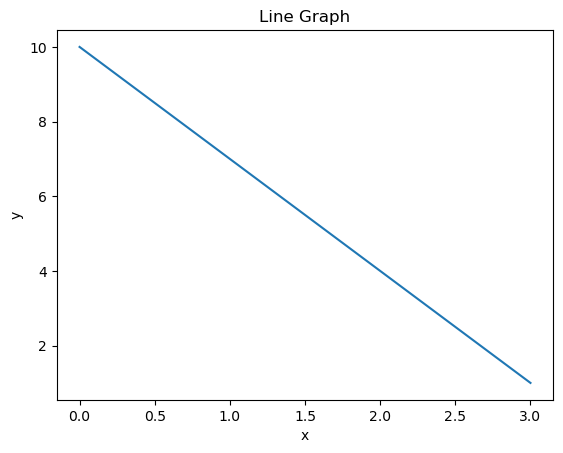

In [3]:
import matplotlib.pyplot as plt

x = [0, 3]
y = [10, 1]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Graph')
plt.show();

### 2.12
B0=7, B1=2인 선형회귀모형 Y = B0 + B1x + e의 평균에 대한 직선을 그래프로 나타내어라.

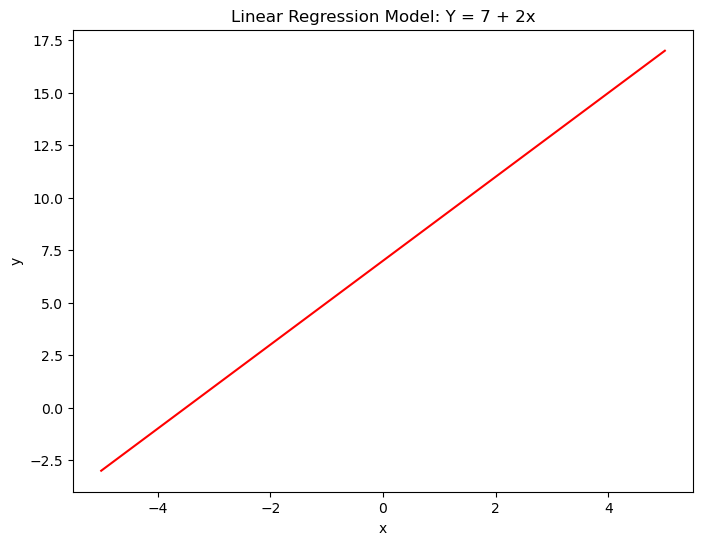

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.linspace(-5, 5, 100)  # x 값의 범위 (-5 ~ 5)
y = 7 + 2 * x  # 직선 방정식

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', label='Regression Line')
plt.title('Linear Regression Model: Y = 7 + 2x')
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()
# plt.grid(True)
plt.show()

### 2.13
다음과 같은 선형회귀모형이 주어졌을 때 물음에 답하라.
Y=B0+B1x+e
여기서 B0 = -1, B1 = -2이고 e은 평균이 0이고 표준편차가 2인 정규분포를 따르는 확률변수이다.

(1) x3일 때 Y의 평균을 구하라. 또한 x=6일 때 Y의 평균을 구하라.

(2) x=6일 때의 값보다 x=3일 때의 값이 항상 크게 나타나는가? 이유를 설명하라.

In [5]:
import numpy as np

# 선형회귀모형 계수
B0 = -1
B1 = -2

# 오차항 e의 분포 정의
mu = 0  # 평균
sigma = 2  # 표준편차

# (1) x=3일 때 Y의 평균과 x=6일 때 Y의 평균 구하기
x1 = 3
x2 = 6

y_mean_x1 = B0 + B1 * x1
y_mean_x2 = B0 + B1 * x2

print(f"x=3일 때 Y의 평균: {y_mean_x1}")
print(f"x=6일 때 Y의 평균: {y_mean_x2}")

# (2) x=6일 때의 값보다 x=3일 때의 값이 항상 크게 나타나는지 여부 확인
print("\nx=6일 때의 값보다 x=3일 때의 값이 항상 크게 나타나는가?")

# 1000번 시뮬레이션
for i in range(1000):
    e1 = np.random.normal(mu, sigma)  # x=3일 때 오차항
    e2 = np.random.normal(mu, sigma)  # x=6일 때 오차항
    
    y1 = B0 + B1 * x1 + e1
    y2 = B0 + B1 * x2 + e2
    
    if y1 > y2:
        pass
    else:
        print(f"시뮬레이션 {i+1}: x=3일 때의 값({y1:.2f})이 x=6일 때의 값({y2:.2f})보다 작게 나타납니다.")
        
print(        
'''
이 코드에서는 먼저 선형회귀모형의 계수와 오차항 e의 분포를 정의합니다. 그리고 x=3일 때와 x=6일 때의 Y의 평균값 계산.
다음으로 1000번의 시뮬레이션을 통해 x=3일 때의 Y의 값과 x=6일 때의 Y의 값을 비교합니다. 

각 시뮬레이션에서 오차항 e를 정규분포에서 무작위로 생성하고, 이를 이용하여 Y의 값을 계산. 
그리고 x=3일 때의 Y의 값과 x=6일 때의 Y의 값을 비교하여 어느 값이 더 크게 나타나는지를 출력.

실행 결과를 보면, 평균값에서는 x=3일 때의 Y의 평균값이 x=6일 때의 Y의 평균값보다 크지만, 
실제 Y의 값은 오차항의 영향으로 인해 x=3일 때의 값이 항상 x=6일 때의 값보다 크지는 않음을 확인.
'''
)

x=3일 때 Y의 평균: -7
x=6일 때 Y의 평균: -13

x=6일 때의 값보다 x=3일 때의 값이 항상 크게 나타나는가?
시뮬레이션 40: x=3일 때의 값(-9.81)이 x=6일 때의 값(-9.24)보다 작게 나타납니다.
시뮬레이션 138: x=3일 때의 값(-12.34)이 x=6일 때의 값(-11.60)보다 작게 나타납니다.
시뮬레이션 194: x=3일 때의 값(-11.76)이 x=6일 때의 값(-10.13)보다 작게 나타납니다.
시뮬레이션 358: x=3일 때의 값(-11.86)이 x=6일 때의 값(-10.95)보다 작게 나타납니다.
시뮬레이션 402: x=3일 때의 값(-10.39)이 x=6일 때의 값(-9.49)보다 작게 나타납니다.
시뮬레이션 500: x=3일 때의 값(-8.89)이 x=6일 때의 값(-7.98)보다 작게 나타납니다.
시뮬레이션 586: x=3일 때의 값(-8.50)이 x=6일 때의 값(-8.50)보다 작게 나타납니다.
시뮬레이션 597: x=3일 때의 값(-10.30)이 x=6일 때의 값(-10.12)보다 작게 나타납니다.
시뮬레이션 747: x=3일 때의 값(-11.61)이 x=6일 때의 값(-11.09)보다 작게 나타납니다.
시뮬레이션 771: x=3일 때의 값(-10.82)이 x=6일 때의 값(-10.58)보다 작게 나타납니다.
시뮬레이션 838: x=3일 때의 값(-8.60)이 x=6일 때의 값(-8.53)보다 작게 나타납니다.
시뮬레이션 844: x=3일 때의 값(-12.22)이 x=6일 때의 값(-10.47)보다 작게 나타납니다.
시뮬레이션 845: x=3일 때의 값(-11.01)이 x=6일 때의 값(-10.01)보다 작게 나타납니다.
시뮬레이션 847: x=3일 때의 값(-11.71)이 x=6일 때의 값(-11.29)보다 작게 나타납니다.
시뮬레이션 876: x=3일 때의 값(-11.01)이 x=6일 때의 값(-10.38)보다 작게 나타납니다.
시뮬레이션 944: x=3일 때의 값(-9.38)이 x=6일 때의 값

## 13.3 최소제곱추정법을 이용한 모수의 추정

- 최소제곱추정량에 따라 편차를 최소로하는 직선을 찾는 방법으로:
    - > 회귀추정곡선 : $\hat y = \hat\beta_0 + \hat\beta_1x$
    - 이 수식에서 $\hat\beta_0$와 $\hat\beta_1$을 찾는 것
- x, y 평균
    - >$\bar x = \frac{\sum{x_i}}{n}, \bar y = \frac{\sum{y_i}}{n}$
- 잔차제곱합
    - >$S_{xx} = \sum (x_i-\bar x)^2 = \sum x_i^2-n\bar x^2 = \sum x_i^2-\frac{(\sum x_i)^2}{n}$
    - >$S_{yy} = \sum (y_i-\bar y)^2 = \sum y_i^2-n\bar y^2 = \sum y_i^2-\frac{(\sum y_i)^2}{n}$
    - >$S_{xy} = \sum (x_i-\bar x)(y_i-\bar y) = \sum x_i y_i - n\bar x\bar y= \sum x_iy_i-\frac{(\sum x_i)(\sum y_i)}{n}$
- 최소제곱추정량
    - >$\hat \beta_1 = \frac{S_{xy}}{S_{xx}}$
    - >$\hat \beta_0 = \bar y -\hat \beta_1 \bar x$

### 3.6
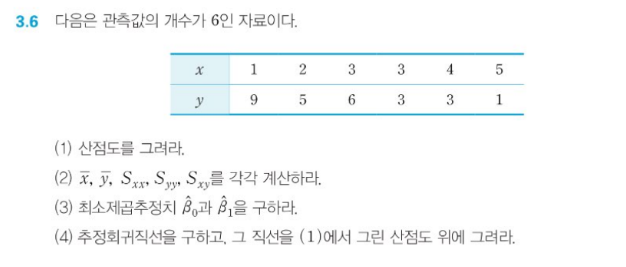

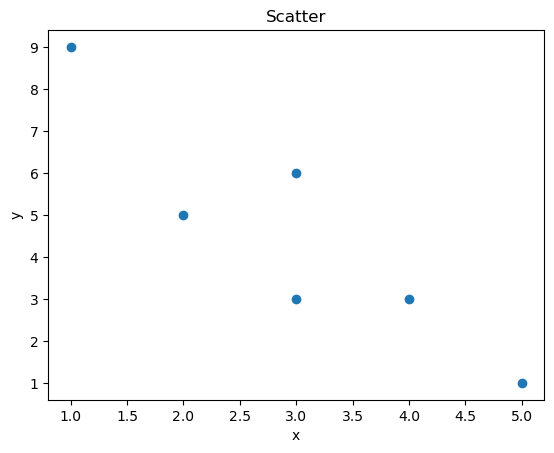

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x = np.array([1,2,3,3,4,5])
y = np.array([9,5,6,3,3,1])

# 산점도 그래프 그리기
# plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Scatter')
plt.xlabel('x')
plt.ylabel('y')
# plt.legend()
# plt.grid(True)
plt.show()

In [7]:
# 평균 계산
x_bar = np.mean(x)
y_bar = np.mean(y)

# S_xx, S_yy, S_xy 계산
S_xx = np.sum((x - x_bar)**2)
S_yy = np.sum((y - y_bar)**2)
S_xy = np.sum((x - x_bar) * (y - y_bar))

# 결과 출력
print(f'x_bar = {x_bar}')
print(f'y_bar = {y_bar}')
print(f"S_xx = {S_xx}")
print(f"S_yy = {S_yy}")
print(f"S_xy = {S_xy}")

x_bar = 3.0
y_bar = 4.5
S_xx = 10.0
S_yy = 39.5
S_xy = -18.0


In [8]:
# 3) 최소제곱 추정치를 구하여라
b1 = S_xy/S_xx
b0 = y_bar - b1*x_bar
# 결과 출력
print("최소제곱 추정치:")
print(f"β0 = {b0:.4f}")
print(f"β1 = {b1:.4f}")

최소제곱 추정치:
β0 = 9.9000
β1 = -1.8000


In [9]:
# # 행렬곱으로 풀이 가능
# n = len(x)
# # 행렬 계산
# X = np.column_stack((np.ones(n), x))  # X 행렬 생성
# beta = np.linalg.inv(X.T @ X) @ X.T @ y  # 최소제곱 추정치 계산
# # 결과 출력
# print("최소제곱 추정치:")
# print(f"β0 = {beta[0]:.4f}")
# print(f"β1 = {beta[1]:.4f}")

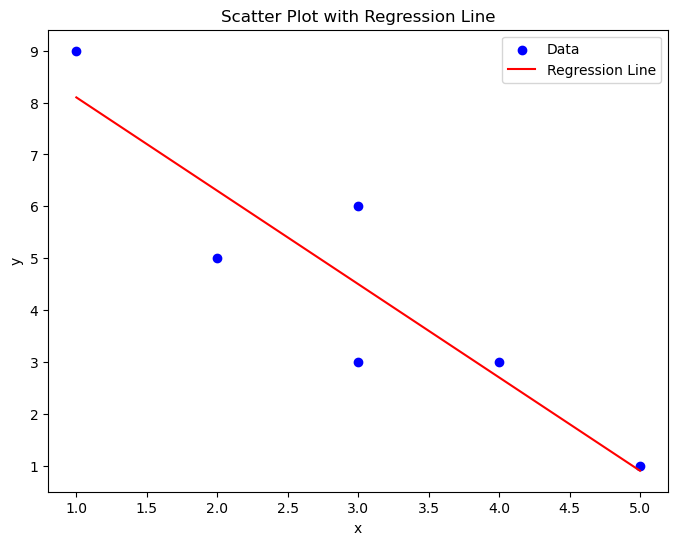

In [10]:
# 추정회귀곡선을 그리고 1에서 그린 산점도 위에 그려라 
import numpy as np
import matplotlib.pyplot as plt

# 회귀곡선 계산
y_hat = b0 + b1 * x

# 산점도와 회귀곡선 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', label='Data')
plt.plot(x, y_hat, color='r', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
# plt.grid(True)
plt.show()

### 3.11

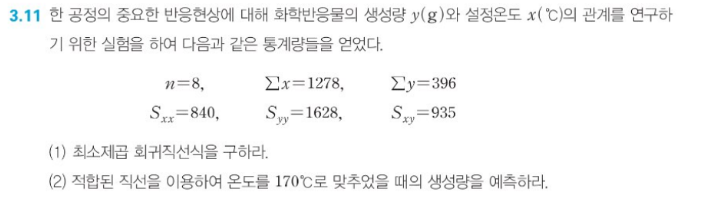

In [11]:
# 최소제곱 회귀직선식 구하기
## 평균 계산
n = 8
x_bar = 1278/n
y_bar = 396/n

##회귀계수 계산
S_xx , S_yy, S_xy = 840 , 1628, 935
b = S_xy / S_xx # 기울기 b
a = y_bar - b * x_bar # y절편 a = y의 평균 - b * x의 평균
res = f'{b}x{a}'
print(res)
print(f'{b*170+a}g')

1.1130952380952381x-128.3169642857143
60.909226190476176g


## 13.4 연습문제

### 4.4
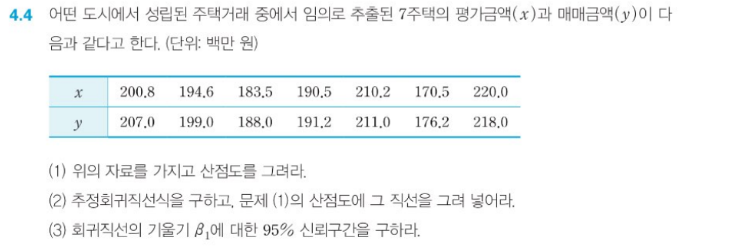

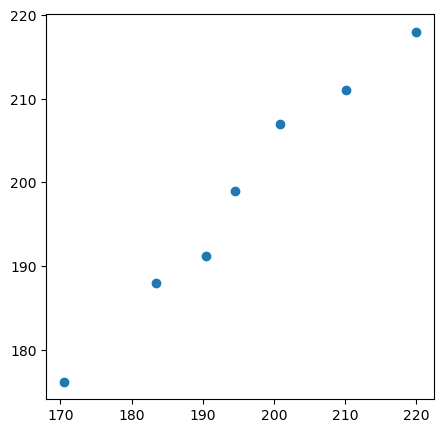

In [12]:
# (1) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = [200.8, 194.6, 183.5, 190.5, 210.2, 170.5, 220]
y = [207,199,188,191.2, 211,176.2,218]
df = pd.DataFrame({'x':x,'y':y})
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'],df['y']);

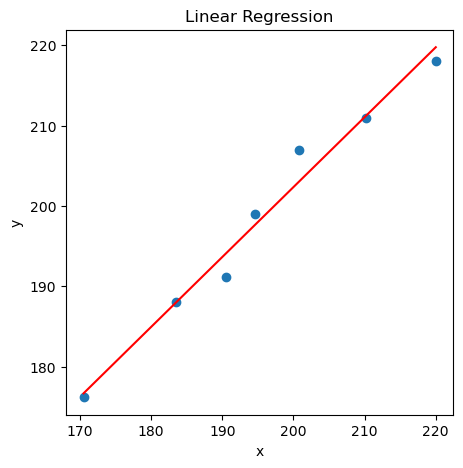

In [13]:
# 추정회귀직선식을 구하고 산점도와 함께 그려라
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 df가 있다고 가정
x_bar = df['x'].mean()
y_bar = df['y'].mean()

S_xx = np.sum((df['x'] - x_bar) ** 2)
S_xy = np.sum((df['x'] - x_bar) * (df['y'] - y_bar))

b = S_xy / S_xx
a = y_bar - b * x_bar

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(df['x'], df['y'])
x_range = np.linspace(df['x'].min(), df['x'].max(), 100)
y_range = a + b * x_range
ax.plot(x_range, y_range, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression')
plt.show()

In [14]:
# 라이브러리로 간단히 풀수도 있음
import numpy as np
import scipy.stats as stats

x, y =df['x'],df['y']

slope, intercept, r_value, p_value, se = stats.linregress(x, y)

# 95% 신뢰구간 계산
alpha = 0.05
n = len(x)  # 데이터 개수
dof = n-2
t_critical = stats.t.ppf(1-alpha/2, dof)  # 95% 신뢰구간에 대한 t 값
slope_confidence_interval = [slope - t_critical * se / np.sqrt(np.sum((x - np.mean(x))**2)),
                             slope + t_critical * se / np.sqrt(np.sum((x - np.mean(x))**2))]

print(f"기울기: {slope:.4f}")
print(f"95% 신뢰구간: [{slope_confidence_interval[0]:.4f}, {slope_confidence_interval[1]:.4f}]")

기울기: 0.8700
95% 신뢰구간: [0.8663, 0.8738]


### 4.6
![image.png]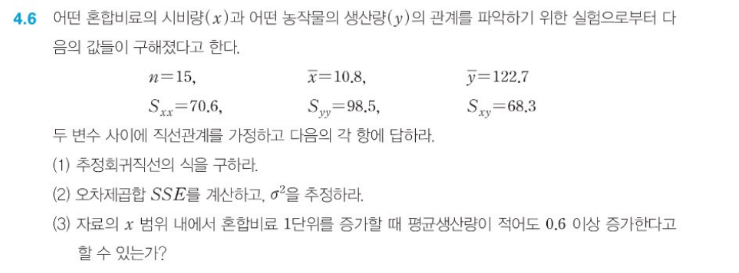(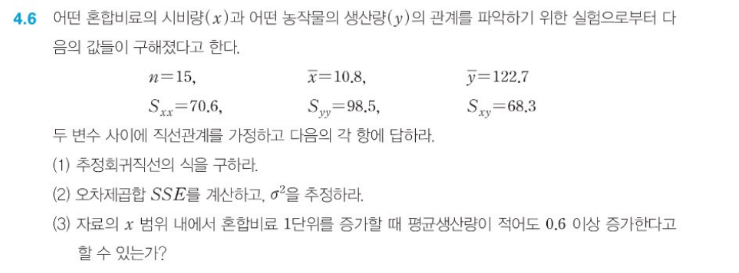)

In [15]:
S_xy , S_xx, S_yy = 68.3, 70.6, 98.5
n, x_bar, y_bar = 15, 10.8, 122.7

b = S_xy / S_xx
a = y_bar - b * x_bar
a,b

(112.25184135977338, 0.9674220963172805)

In [16]:
import math
import random 

# 회귀계수 b 계산
b = S_xy / S_xx

# 절편 a 계산
a = y_bar - b * x_bar

# 회귀식
def regression_line(x):
    return a + b * x

# SSE 계산
SSE = 0
# 가상의 x_values 생성
x_values = [x for x in range(8, 8+n)]

# 가상의 y_values 생성
y_values = [a + b * x + random.uniform(-2, 2) for x in x_values]

for i in range(n):
    x_i = x_values[i] # x_i 값 입력
    y_i = y_values[i]  # y_i 값 입력
    SSE += (y_i - regression_line(x_i))**2

print(f"SSE: {SSE:.2f}")

# sigma^2 추정
sigma_sq = SSE / (n - 2)
print(f"sigma^2: {sigma_sq:.2f}")

# 혼합비료 1단위 증가 시 평균생산량 증가 여부
if b >= 0.6:
    print("혼합비료 1단위 증가 시 평균생산량이 적어도 0.6 이상 증가합니다.")
else:
    print("혼합비료 1단위 증가 시 평균생산량이 0.6 미만으로 증가합니다.")

SSE: 21.19
sigma^2: 1.63
혼합비료 1단위 증가 시 평균생산량이 적어도 0.6 이상 증가합니다.


### 4.8
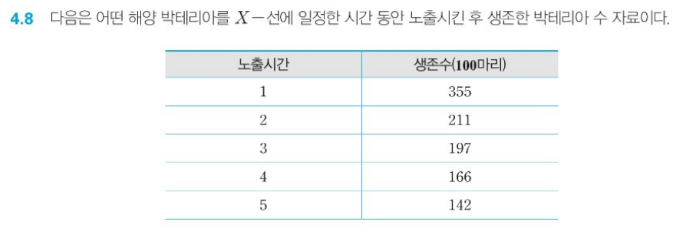
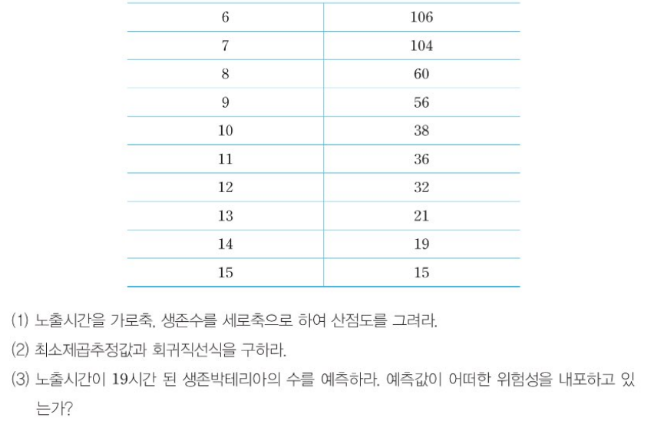

Text(0, 0.5, 'No. of Survived Bacteria')

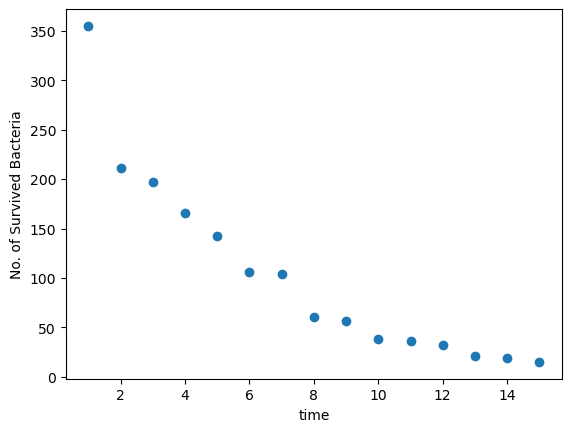

In [17]:
x = np.arange(1,16)
y = np.array([355,211,197,166,142,
              106,104,60,56,38,
              36,32,21,19,15])
fig,ax = plt.subplots()
plt.scatter(x,y)

ax.set_xlabel('time')
ax.set_ylabel('No. of Survived Bacteria')

In [18]:
import numpy as np

# 데이터 생성
x = np.arange(1, 16)
y = np.array([355, 211, 197, 166, 142, 106, 104, 60, 56, 38, 36, 32, 21, 19, 15])

# 회귀직선 구하기
x_bar, y_bar = x.mean(), y.mean()
S_xx, S_xy = np.sum((x-x_bar)**2), np.sum((x-x_bar)*(y-y_bar))
b1 = S_xy / S_xx
b0 = y_bar - b1 * x_bar

# 회귀직선식
regression_line = f"y = {b1:.2f}x + {b0:.2f}"
print("회귀직선식:", regression_line)

# x가 19일 때의 예측값 계산
x_new = 19
y_new = b1 * x_new + b0
print(f"x가 19일 때의 예측값: {y_new:.2f}")

회귀직선식: y = -19.46x + 259.58
x가 19일 때의 예측값: -110.24


## 13.5 연습문제

### 5.2
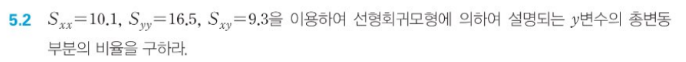

In [19]:
# R^2 = SSR / SST 
# SSR = b1 * S_xy
# SST = S_yy

S_xx, S_yy, S_xy = 10.1,   16.5,  9.3
b1 = S_xy / S_xx
SSR = b1 * S_xy

res  = SSR / S_yy
res

0.5189918991899191

### 5.5
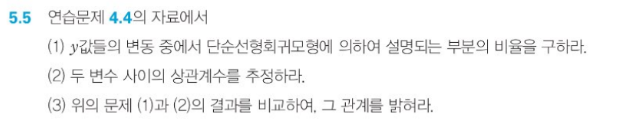

## 13.6 연습문제

### 6.2

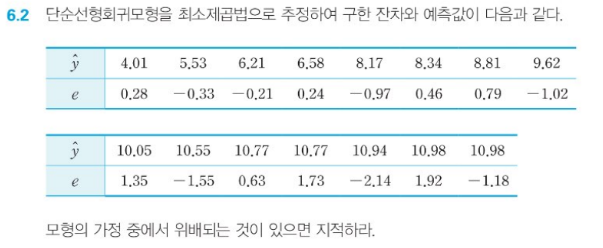

In [20]:
y_hat = [4.01, 5.53, 6.21, 6.58, 8.17, 8.34, 8.81, 9.62, 10.05, 10.55, 10.77, 10.77, 10.94, 10.98, 10.98]
e = [0.28, -0.33, -0.21, 0.24, -0.97 ,0.46, 0.79 ,-1.02,1.35, -1.55, 0.63, 1.73, -2.14, 1.92, -1.18]

len(y_hat),len(e)

(15, 15)

### 6.4
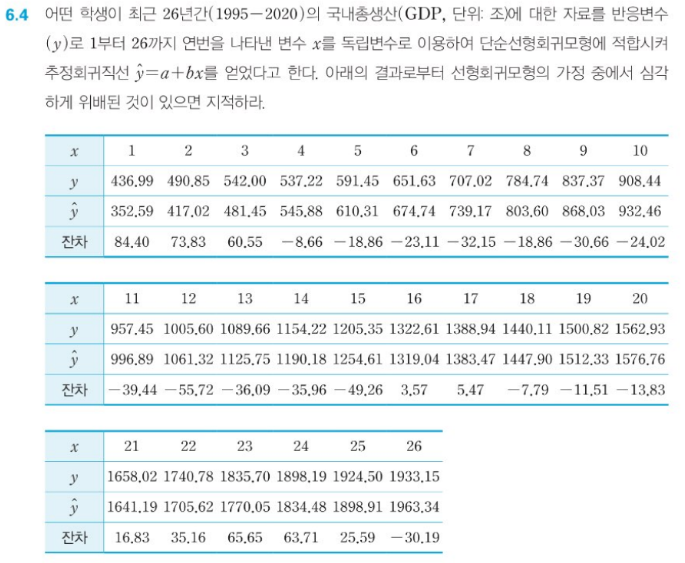

In [21]:
import numpy as np
x = np.arange(1,27)
y = np.array([436.99, 490.85, 542.00, 537.22, 591.45, 651.63, 707.02, 784.74, 837.37, 908.44,
              957.45, 1005.60, 1089.66, 1154.22, 1205.35, 1322.61, 1388.94, 1440.11, 1500.82, 1562.93,
              1658.02, 1740.78, 1835.70, 1898.19, 1924.50, 1933.15])
                           
y_hat = np.array([352.59, 417.02, 481.45, 545.88, 610.31, 674.74, 739.17, 803.60, 868.03, 932.46,
                 996.89, 1061.32, 1125.75, 1190.18, 1254.61, 1319.04, 1383.47, 1447.90, 1512.33, 1576.76,
                 1641.19 ,1705.62, 1770.05, 1834.48 ,1898.91, 1963.34])

len(x), len(y), len(y_hat)

(26, 26, 26)

## 종합문제

### 7.6
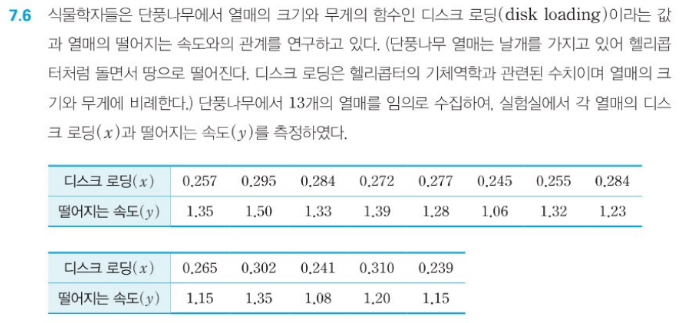
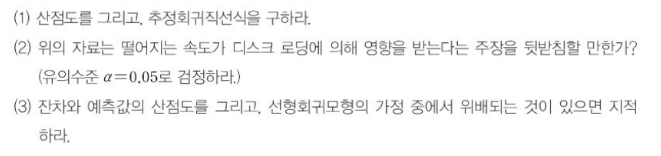

(1) 산 점 도 를 그 리 고 , 추 정 회 귀 직 선 식 을 구 하 라 .

(2) 위 의 자 료 는 떨 어 지는 속 도 가 디스크 로 딩 에 의 해 영 향 을 받 는 다 는 주장을 뒷 받 침 할 만 한 가 ?
(유의수준 a=0.05로 검 정 하 라 )

(3) 잔 차 와 예 측 값 의 산 점 도 를 그 리 고 , 선 형 회 귀 모 형 의 가 정 중 에 서 위 배 되 는 것 이 있 으 면 지 적
하 라 .

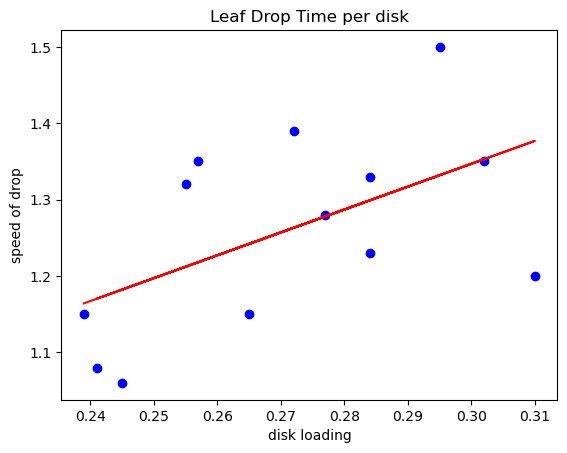

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x= np.array([0.257, 0.295 , 0.284 , 0.272 , 0.277 , 0.245 , 0.255, 0.284,0.265, 0.302, 0.241, 0.310, 0.239]) # 디스크로딩
y= np.array([1.35, 1.50, 1.33, 1.39, 1.28, 1.06, 1.32, 1.23, 1.15, 1.35, 1.08, 1.20, 1.15]) # 떨어지는 속도 

x_bar, y_bar = x.mean(), y.mean()
S_xx, S_yy, S_xy = np.sum((x-x_bar)**2), np.sum((y-y_bar)**2), np.sum((x-x_bar)*(y-y_bar))
b1 = S_xy/S_xx
b0 = y_bar - b1 * x_bar

fig, ax = plt.subplots()

plt.scatter(x,y,color='b')
plt.plot(x, b0+b1*x,color='r')
ax.set_xlabel('disk loading')
ax.set_ylabel('speed of drop')
plt.title('Leaf Drop Time per disk')
plt.show()

### 7.12
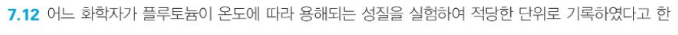
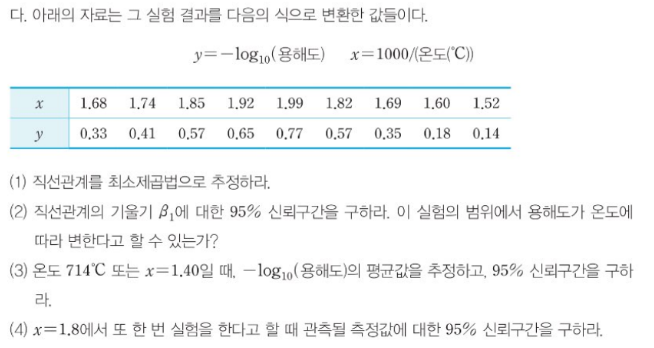

(1) 직 선 관 계 를 최 소 제 곱 법 으 로 추 정 하 라 .

(2) 직 선 관 계 의 기 울 기에 대 한 95% 신 뢰 구 간 을 구 하 라 . 
이 실 험 의 범 위 에 서 용 해 도 가 온 도 에 따 라 변 한 다 고 할 수 있 는 가 ?

(3) 온 도 714°C 또 는 x=1.40 일 때 , $-log_{10}$(용해도) 평 균 값 을 추 정 하 고 , 95% 신 뢰 구 간 을 구 하라

(4) x:1.8 에 서 또 한 번 실 험 을 한 다 고 할 때 관 측 될 측 정 값 에 대한 95% 신 뢰 구 간 을 구 하 라 .

In [45]:
x = np.array([float(n) for n in '1.68 1.74 1.85 1.92 1.99 1.82 1.69 1.60 1.52'.replace(' ',',').split(',')])
y = np.array([float(n) for n in '0.33 0.41 0.57 0.65 0.77 0.57 0.35 0.18 0.14'.replace(' ',',').split(',')])


x_bar, y_bar,= x.mean(),y.mean()
S_xx, S_xy = np.sum((x-x_bar)**2), np.sum((x-x_bar)*(y-y_bar))
b1 = S_xy/S_xx
b0 = y_bar - b1 * x_bar
print(f"\n직선 방정식: y = {b1:.2f}x + {b0:.2f}")


직선 방정식: y = 1.40x + -2.01


In [74]:
'''
직선관계의 기울기에 대한 95% 신뢰구간을 구하라 . 
이 실험의 범위에서 용해도가 온도에 따라 변한다고 할 수 있는가 ?
'''
# 잔차 계산
residuals = y - (b1 * x + b0)

# 자유도 계산
dof = len(x) - 2

# 표준오차 계산
se = np.sqrt(np.sum(residuals**2) / dof) / np.sqrt(np.sum((x - np.mean(x))**2))

# t 통계량 계산
t_stat = b1 / se

# 95% 신뢰구간 계산
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)
ci_lower = b1 - t_crit * se_m
ci_upper = b1 + t_crit * se_m

print(f"기울기(b1) = {b1:.2f}")
print(f"95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")

# 용해도와 온도의 관계 판단
if ci_lower > 0 and ci_upper > 0:
    print("이 실험의 범위에서 용해도는 온도에 따라 증가합니다.")
elif ci_lower < 0 and ci_upper < 0:
    print("이 실험의 범위에서 용해도는 온도에 따라 감소합니다.")
else:
    print("이 실험의 범위에서 용해도와 온도의 관계를 판단할 수 없습니다.")

기울기(b1) = 1.40
95% 신뢰구간: (1.25, 1.54)
이 실험의 범위에서 용해도는 온도에 따라 증가합니다.


In [69]:
# 새로운 x값에 대한 y 예측
x_new = 1.4
y_pred = b1 * x_new + b0

# 잔차 계산
residuals = y - (b1 * x + b0)

# 자유도 계산
dof = len(x) - 2

# 표준오차 계산
se_y_pred = np.sqrt(np.sum(residuals**2) / dof * (1 + 1/len(x)
                                                  + (x_new - np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# t 통계량 계산
t_stat = y_pred / se_y_pred

# 95% 신뢰구간 계산
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)
ci_lower = y_pred - t_crit * se_y_pred
ci_upper = y_pred + t_crit * se_y_pred

print(f"온도 x=1.4일 때, -log10(용해도) 예측값 = {y_pred:.2f}")
print(f"95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")

온도 x=1.4일 때, -log10(용해도) 예측값 = -0.06
95% 신뢰구간: (-0.14, 0.03)


In [67]:
# x:1.8 에 서 또 한 번 실 험 을 한 다 고 할 때 관 측 될 측 정 값 에 대한 95% 신 뢰 구 간 을 구 하 라 .

from scipy.stats import t

# 새로운 x값에 대한 y 예측
x_new = 1.8
y_pred = b1 * x_new + b0

# 잔차 계산
residuals = y - (b1 * x + b0)

# 자유도 계산
dof = len(x) - 2

# 표준오차 계산
se_y_pred = np.sqrt(np.sum(residuals**2) / dof * (1 + 1/len(x)
                                                  + (x_new - np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# t 통계량 계산
t_stat = y_pred / se_y_pred

# 95% 신뢰구간 계산
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)
ci_lower = y_pred - t_crit * se_y_pred
ci_upper = y_pred + t_crit * se_y_pred

print(f"온도 x=1.8일 때, -log10(용해도) 예측값 = {y_pred:.2f}")
print(f"95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")


온도 x=1.8일 때, -log10(용해도) 예측값 = 0.50
95% 신뢰구간: (0.44, 0.57)


### 7.14
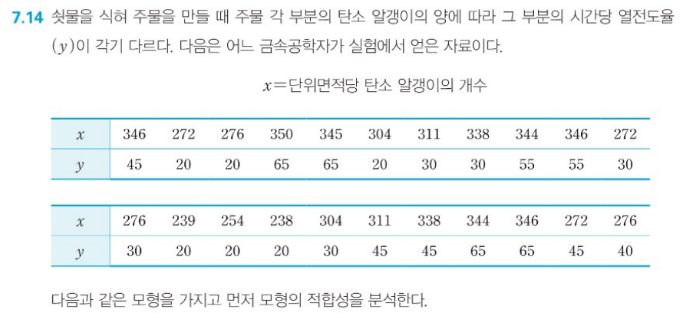
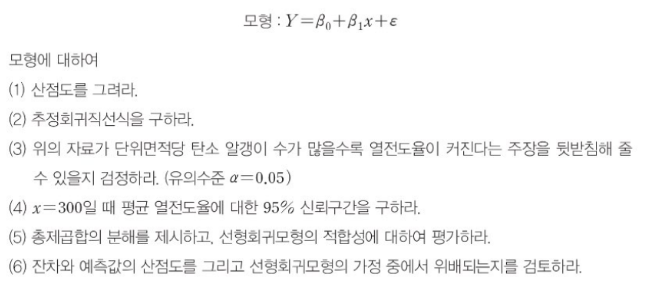

모 형 : $Y=\beta_0+\beta_1 x + e$

모 형에 대 하 여

(1) 산 점 도 를 그 려 라 .

(2) 추 정 회 귀 직 선 식 을 구 하 라 .

(3) 위 의 자 료 가 단 위 면 적 당 탄 소 알 갱 이 수 가 많 을 수 록 열 전 도 율 이 커 진 다 는 주 징 을 뒷 받 침 해 줄 수 있 을 지 검 정 하 라 . (유의수준 a=0.05)

(4) x=300 일때 평균 열 전 도 율 에 대 한 95% 신 뢰 구 간 을 구 하 라.

(5) 총 제 곱 합 의 분 해 를 제 시 하 고 , 선 형 회 귀 모 형 의 적 합 성에 대 하 여 평 가 하 라 .

(6) 잔 차 와 예 측 값 의 산 점 도 를 그 리 고 선 형 회 귀 모 형 의 가 정 중 에 서 위 배 되 는 지 를 검 토 하 라 .

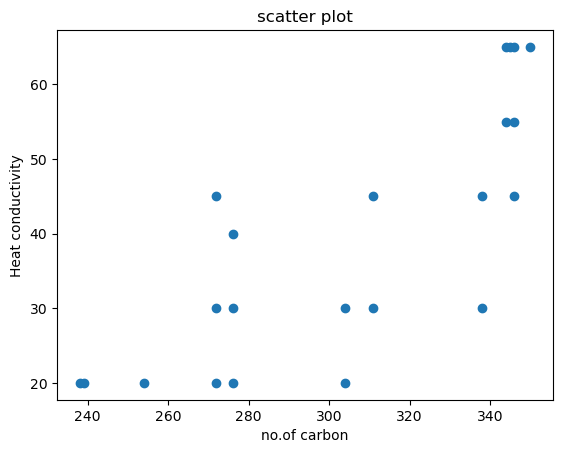

In [80]:
'''
산 점 도 를 그 려 라 .
'''

x = np.array([float(n) for n in '346 272 276 350 345 304 311 338 344 346 272 276 239 254 238 304 311 338 344 346 272 276'.replace(' ',',').split(',')])
y = np.array([float(n) for n in '45 20 20 65 65 20 30 30 55 55 30 30 20 20 20 30 45 45 65 65 45 40'.replace(' ',',').split(',')])

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('no.of carbon')
plt.ylabel('Heat conductivity')
plt.title('scatter plot')
plt.show()

In [78]:
'''
추 정 회 귀 직 선 식 을 구 하 라 .
'''
x_bar, y_bar,= x.mean(),y.mean()
S_xx, S_xy = np.sum((x-x_bar)**2), np.sum((x-x_bar)*(y-y_bar))
b1 = S_xy/S_xx
b0 = y_bar - b1 * x_bar
print(f"\n직선 방정식: y = {b1:.2f}x + {b0:.2f}")


직선 방정식: y = 0.34x + -65.72


In [81]:
'''
위 의 자 료 가 단 위 면 적 당 탄 소 알 갱 이 수 가 많 을 수 록 
열 전 도 율 이 커 진 다 는 주 징 을 뒷 받 침 해 줄 수 있 을 지 검 정 하 라 . (유의수준 a=0.05)
'''
# 최소제곱법 계수 계산
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# 잔차 계산
residuals = y - (m * x + c)

# 자유도 계산
dof = len(x) - 2

# 표준오차 계산
se_m = np.sqrt(np.sum(residuals**2) / dof) / np.sqrt(np.sum((x - np.mean(x))**2))

# t 통계량 계산
t_stat = m / se_m

# 유의수준 0.05에 대한 임계값 계산
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)

print(f"기울기(m) = {m:.2f}")
print(f"t 통계량 = {t_stat:.2f}")
print(f"임계값(t_{dof}, {1 - alpha/2}) = {t_crit:.2f}")

# 기울기 유의성 검정
if abs(t_stat) > t_crit:
    print("단위 면적당 탄소 알갱이 수가 많을수록 열전도율이 커진다는 주장을 기각할 수 없습니다.")
else:
    print("단위 면적당 탄소 알갱이 수가 많을수록 열전도율이 커진다는 주장을 기각합니다.")


기울기(m) = 0.34
t 통계량 = 5.74
임계값(t_20, 0.975) = 2.09
단위 면적당 탄소 알갱이 수가 많을수록 열전도율이 커진다는 주장을 기각할 수 없습니다.


In [82]:
'''
xdddd=300 일때 평균 열 전 도 율 에 대 한 95% 신 뢰 구 간 을 구 하 라.
'''

# 잔차 계산
residuals = y - (m * x + c)

# 자유도 계산
dof = len(x) - 2

# 표준오차 계산
se_y_pred = np.sqrt(np.sum(residuals**2) / dof * (1 + 1/len(x) + (300 - np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# t 통계량 계산
y_pred = m * 300 + c
t_stat = y_pred / se_y_pred

# 95% 신뢰구간 계산
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, dof)
ci_lower = y_pred - t_crit * se_y_pred
ci_upper = y_pred + t_crit * se_y_pred

print(f"x=300일 때, 평균 열전도율 예측값 = {y_pred:.2f}")
print(f"95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")

x=300일 때, 평균 열전도율 예측값 = 37.50
95% 신뢰구간: (14.92, 60.07)
